In [1]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from plotnine import *

In [3]:
df = pd.read_csv("E:\\Courses\\DataScience\\csv\\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

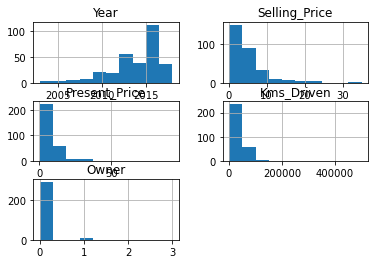

In [4]:
df.hist()

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Selling_Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Year'>,
        <AxesSubplot:xlabel='Owner', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Selling_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>],
       [<AxesSubplot:xlabel='Year', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Owner', ylabel='Present_Price'>],
       [<AxesSubplot:xlabel='Year', ylabel='Kms_Driv

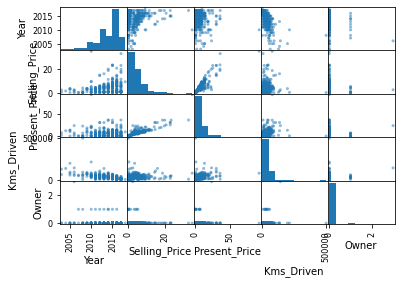

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [8]:
df.shape

(301, 9)

In [9]:
df['Selling_Price'].quantile(0.25)

0.9

In [10]:
df['Selling_Price'].mean()

4.661295681063127

In [12]:
df['Selling_Price'].quantile(0.50)

3.6

In [13]:
df['Selling_Price'].quantile(0.75)

6.0

In [15]:
df['Selling_Price'].quantile(1)

35.0

In [16]:
df['Selling_Price'].max()

35.0

In [17]:
df['Selling_Price'].min()

0.1

In [18]:
df['Selling_Price'].quantile(0)

0.1

In [4]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
fdf = df[["Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type"]]
fdf

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,2014,3.35,5.59,27000,Petrol
1,2013,4.75,9.54,43000,Diesel
2,2017,7.25,9.85,6900,Petrol
3,2011,2.85,4.15,5200,Petrol
4,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel
297,2015,4.00,5.90,60000,Petrol
298,2009,3.35,11.00,87934,Petrol
299,2017,11.50,12.50,9000,Diesel


In [8]:
fdf.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
dtype: int64

In [10]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,2014,3.35,5.59,27000,Petrol
1,2013,4.75,9.54,43000,Diesel
2,2017,7.25,9.85,6900,Petrol
3,2011,2.85,4.15,5200,Petrol
4,2014,4.60,6.87,42450,Diesel


In [11]:
fdf['current_year'] = 2020

<ipython-input-11-4f2b44b2cdf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
fdf['no_years']  = fdf['current_year']-fdf['Year']
fdf.head()

<ipython-input-12-6cea8fbd7a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,current_year,no_years
0,2014,3.35,5.59,27000,Petrol,2020,6
1,2013,4.75,9.54,43000,Diesel,2020,7
2,2017,7.25,9.85,6900,Petrol,2020,3
3,2011,2.85,4.15,5200,Petrol,2020,9
4,2014,4.60,6.87,42450,Diesel,2020,6


In [13]:
fdf.drop(['Year'], axis=1, inplace=True)
fdf.head()

C:\Users\Nageshreddy\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,current_year,no_years
0,3.35,5.59,27000,Petrol,2020,6
1,4.75,9.54,43000,Diesel,2020,7
2,7.25,9.85,6900,Petrol,2020,3
3,2.85,4.15,5200,Petrol,2020,9
4,4.60,6.87,42450,Diesel,2020,6


In [14]:
fdf1 = pd.get_dummies(fdf, drop_first=True)
fdf1.head()

,Selling_Price,Present_Price,Kms_Driven,current_year,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,2020,6,0,1
1,4.75,9.54,43000,2020,7,1,0
2,7.25,9.85,6900,2020,3,0,1
3,2.85,4.15,5200,2020,9,0,1
4,4.60,6.87,42450,2020,6,1,0


In [15]:
fdf2 = fdf1.drop(['current_year'], axis=1)
fdf2.head()

,Selling_Price,Present_Price,Kms_Driven,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,6,0,1
1,4.75,9.54,43000,7,1,0
2,7.25,9.85,6900,3,0,1
3,2.85,4.15,5200,9,0,1
4,4.60,6.87,42450,6,1,0


In [7]:
import seaborn as sns;
sns.pairplot(fdf2)

NameError: name 'fdf2' is not defined

In [17]:
import matplotlib.pyplot as plt
corrmat = fdf2.corr()
corrmat

,Selling_Price,Present_Price,Kms_Driven,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol
Selling_Price,1.000000,0.878983,0.029187,-0.236141,0.552339,-0.540571
Present_Price,0.878983,1.000000,0.203647,0.047584,0.473306,-0.465244
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.172515,-0.172874
no_years,-0.236141,0.047584,0.524342,1.000000,-0.064315,0.059959
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,1.000000,-0.979648
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,-0.979648,1.000000


In [34]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(), annot=True)

KeyError: "['Seller_Type_Individual', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Fuel_Type_Diesel', 'no_years'] not in index"

<Figure size 1440x1440 with 0 Axes>

In [18]:
X = fdf2.iloc[:,1:]
y = fdf1.iloc[:,0]
X.head()

,Present_Price,Kms_Driven,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol
0,5.59,27000,6,0,1
1,9.54,43000,7,1,0
2,9.85,6900,3,0,1
3,4.15,5200,9,0,1
4,6.87,42450,6,1,0


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [21]:
model.feature_importances_

array([0.89299964, 0.0198475 , 0.08016751, 0.0015386 , 0.00544674])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [25]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
preds = regressor.predict(X_test)
preds

array([ 3.1925,  1.1151,  0.4512,  7.3451,  4.5315,  0.5951,  7.244 ,
        0.4971,  4.802 ,  4.556 ,  0.3774,  5.6807, 15.243 ,  5.3495,
        3.3025,  0.5675,  2.8485,  4.6765,  0.4332,  5.7378,  4.4993,
        1.0663, 19.522 ,  0.4483,  7.2015,  0.5498,  0.3788,  4.5363,
       11.742 ,  3.0983,  8.1855,  0.6763,  6.194 ,  0.4828,  4.372 ,
        3.3171,  4.0325,  0.4374,  3.3135,  2.7545,  5.478 ,  2.8671,
        0.6383,  2.4615,  6.2695,  7.6928, 10.7332,  5.8165,  6.993 ,
        8.274 ,  3.7095,  5.136 , 11.1205,  2.9415,  7.975 ,  4.622 ,
        5.773 ,  0.3929,  0.2223,  2.7675,  4.0796,  1.4995,  9.9369,
       15.8562,  1.1564,  0.775 ,  5.0215,  4.8939,  5.686 ,  0.4463,
        4.807 ,  0.5463,  5.3975,  2.9455,  0.4362,  1.0652,  8.0853,
        9.1105,  7.7028, 10.3444,  6.913 ,  0.2723,  0.4391,  4.9805,
        0.4874,  6.929 ,  0.2252,  0.2137,  0.5335,  4.7105,  0.387 ])

In [27]:
pd1 = pd.DataFrame(preds)

In [35]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [33]:
print('MAE: ', MAE(y_test, preds))

MAE:  0.5326142857142856


In [36]:
MSE(y_test, preds)

0.6941649779120869

In [39]:
import numpy as np
np.sqrt(MSE(y_test, preds))

0.8331656365405902

In [40]:
import pickle

In [41]:
file = open('car_price_prediction.pkl','wb')
pickle.dump(regressor, file)

In [100]:
pd1.to_csv('mycsvfile.csv',index=False)